# More Multivariate Normal Things


## What is not Multivariate Regression

--- 

Rather than $\mathbf{y}_{n\times 1} \sim \mathcal{MVN}(\mathbf{X}_{n\times p}\boldsymbol{\beta}_{p\times 1}, \Sigma_{n\times n} = \sigma^2I_{n\times n})$

- where we used a multivariate $\mathcal{MVN}(\underset{p \times 1}{\boldsymbol\beta_0}, \underset{p \times p}{\Sigma_\beta})$ prior fo  $\boldsymbol \beta_{p\times 1}$ 
- and a univariate prior for precision $\phi = \sigma^{-2}$ or variance $\sigma^2$ such as $\text{gamma}(a,b)$ or $\mathcal{IG}(a,b)$

what about $\underset{m\times 1}{\mathbf{y}_i} \overset{iid}{\sim} \mathcal{MVN}(\boldsymbol{\beta}_{m\times p}^\top \underset{p\times 1}{\mathbf{x}_i},  \Sigma_{m\times m} \neq \sigma^2I_{n\times n})$ which models

- $\underset{n\times m}{\mathbf{y}}$ with
    - $E[\underset{n\times p}{\mathbf{y}}| \underset{n\times m}{\mathbf{X}} ] = \underset{n\times p}{\mathbf{X}}\boldsymbol{\beta}_{p\times m}$
    - $COV[\underset{\text{both } m\times 1}{\mathbf{y}_i, \mathbf{y}_j}] = \Sigma_{m\times m} $


The **likelihood** is
   
$\begin{align*}
f(\underset{n\times m}{\mathbf{y}}|\underset{n\times p}{\mathbf{X}}, \boldsymbol{\beta}_{p\times m}, \Sigma_{m\times m})
& ={} \prod_{i=1}^n (2\pi )^{-m/2}\det(\Sigma_{m\times m})^{-1/2}\,\exp \left(-{\frac {1}{2}}(\underset{m\times 1}{\mathbf{y}_i} - \boldsymbol{\beta}_{m\times p}^\top \underset{p\times 1}{\mathbf{x}_i} )^\top \Sigma_{m\times m}^{-1}(\underset{m\times 1}{\mathbf{y}_i} - \boldsymbol{\beta}_{m\times p}^\top \underset{p\times 1}{\mathbf{x}_i} )\right)\\ 
& \propto{} \det({ {\Sigma }})^{-n/2}\,\exp \left(\sum_{i=1}^n -{\frac {1}{2}}(\underset{m\times 1}{\mathbf{y}_i} - \boldsymbol{\beta}_{m\times p}^\top \underset{p\times 1}{\mathbf{x}_i} )^\top\Sigma_{m\times m}^{-1}(\underset{m\times 1}{\mathbf{y}_i} - \boldsymbol{\beta}_{m\times p}^\top \underset{p\times 1}{\mathbf{x}_i} )\right)\\ 
& \quad\; \text{The trace of a square matrix is the sum of its diagonal elements}\\
& = \det({ {\Sigma }})^{-n/2}\,\exp \left(-\frac{1}{2} \text{trace}\big((\underset{n\times m}{\mathbf{y}} - \underset{n\times p}{\mathbf{X}}\boldsymbol{\beta}_{p\times m}) \Sigma_{m\times m}^{-1} (\underset{n\times m}{\mathbf{y}} - \underset{n\times p}{\mathbf{X}}\boldsymbol{\beta}_{p\times m})^\top\big)\right)\\ 
& = \det({ {\Sigma }})^{-n/2}\,\exp \overset{\Large \text{trace}(ABC) \; = \;  \text{trace}(CAB)}{\left( -\frac{1}{2} \text{trace}\big((\underset{n\times m}{\mathbf{y}} - \underset{n\times p}{\mathbf{X}}\boldsymbol{\beta}_{p\times m})^\top(\underset{n\times m}{\mathbf{y}} - \underset{n\times p}{\mathbf{X}}\boldsymbol{\beta}_{p\times m}) \Sigma_{m\times m}^{-1} \big)\right)}\\ 
& = \det({\Sigma})^{-n/2}\,\exp \left( -\frac{1}{2} \text{trace}\big(\underset{\text{both } m\times m}{\boldsymbol \epsilon^\top \boldsymbol \epsilon} \underset{m\times m}{\Sigma^{-1}}\big)\right)\\ 
& = \det({\Sigma})^{-n/2}\,\exp \left( -\frac{1}{2} \text{trace}\big( \tilde{\underset{m\times m}{\boldsymbol \Psi}} \underset{m\times m}{\Sigma^{-1}}\big) \right)\\ 
& \propto {}
\mathcal{W}^{-1}\left({\mathbf\Psi} = \tilde{\underset{m\times m}{\boldsymbol \Psi}}, \nu = n-m-1 \right) 
\end{align*}$

an [Inverse-Wishart](https://en.wikipedia.org/wiki/Inverse-Wishart_distribution) distribution when viewed as a function of $\Sigma$.


## Inverse-Wishart Distributions

---

Thus for an **inverse Wishart** $\mathcal{W}^{-1}\left({\mathbf\Psi} = \underset{m\times m}{\boldsymbol \Psi_0}, \nu = n_0 \right)$ 
 prior for covariance $\Sigma_{m\times m}$ the **full conditional**

$\begin{align*}
f(\Sigma_{m\times m} | \underset{n\times m}{\mathbf{y}},\underset{n\times p}{\mathbf{X}}, \boldsymbol{\beta}_{p\times m}) &\propto{}
f(\underset{n\times m}{\mathbf{y}}|\underset{n\times p}{\mathbf{X}}, \boldsymbol{\beta}_{p\times m}, \Sigma_{m\times m}) \times p(\Sigma)\\
&\propto{} 
\det({\Sigma})^{-n/2}\,\exp \left( -\frac{1}{2} \text{trace}\big( \tilde{\underset{m\times m}{\boldsymbol \Psi}} \underset{m\times m}{\Sigma^{-1}}\big) \right) \times 
\det({\Sigma})^{-(n_0+m+1)/2}\,\exp \left( -\frac{1}{2} \text{trace}\big( {\underset{m\times m}{\boldsymbol \Psi_0}} \underset{m\times m}{\Sigma^{-1}}\big) \right)\\
&\propto{} 
\det({\Sigma})^{-(n+n_0+m+1)/2}\,\exp \left( -\frac{1}{2} \text{trace}\big( \tilde{\underset{m\times m}{\boldsymbol \Psi}} \underset{m\times m}{\Sigma^{-1}}\big) -\frac{1}{2} \text{trace}\big( {\underset{m\times m}{\boldsymbol \Psi_0}} \underset{m\times m}{\Sigma^{-1}}\big) \right)\\
&\propto{} 
\det({\Sigma})^{-(n+n_0+m+1)/2}\,\exp \left( -\frac{1}{2} \text{trace}\Big( \big( \tilde{\underset{m\times m}{\boldsymbol \Psi}} + {\underset{m\times m}{\boldsymbol \Psi_0}} \big) \underset{m\times m}{\Sigma^{-1}} \Big) \right) 
\end{align*}$

is also seen to be an **inverse Wishart** $\mathcal{W}^{-1}\left({\mathbf\Psi} = \tilde{\underset{m\times m}{\boldsymbol \Psi}} + \underset{m\times m}{\boldsymbol \Psi_0}, \nu = n+n_0 \right)$ 

---

## Conditional MVN distributions (are MVN distributions) 

For **MVN** $f( \mathbf{\tilde x} = (\mathbf x,\mathbf x^*) )$ 

$$p\left(\mathbf{\tilde x}\;\Bigg|\;\boldsymbol \mu = \left[\begin{array}{c} \underset{q\times1}{\boldsymbol \mu_{\mathbf{ x}}}\\ \underset{r\times1}{\boldsymbol \mu_{\mathbf{ x^*}}} \end{array} \right], \boldsymbol \Sigma = \left[\begin{array}{cc}  \underset{q\times q}{{\boldsymbol {\Sigma }}_{\mathbf{x}}} &  \underset{q\times r}{{\boldsymbol {\Sigma }}_{\mathbf{x},\mathbf{x^*}}}\\  \underset{r \times q}{{\boldsymbol {\Sigma }}_{\mathbf{x^*}\!\!,\,\mathbf{x}} =  {\boldsymbol {\Sigma }}_{\mathbf{x},\mathbf{x^*}}^T} &  \underset{r\times r}{{\boldsymbol {\Sigma }}_{\mathbf{x*}}}\end{array}\right] \right) = {\frac {\exp \left(-{\frac {1}{2}}\left({\mathbf {\tilde x} }-{\boldsymbol {\mu }}\right)^{\mathrm {T} }{\boldsymbol {\Sigma }}^{-1}\left({\mathbf {\tilde x} }-{\boldsymbol {\mu }}\right)\right)}{\sqrt {(2\pi )^{q+r}|{\boldsymbol {\Sigma }}|}}}$$

the **conditional distribution** $f(\mathbf x^* | \mathbf x)$ of [is also **MVN**](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Conditional_distributions)
 
$$\mathbf{x^*} | \mathbf x, \boldsymbol \mu, \boldsymbol \Sigma \sim  \mathcal{MVN}\left( {\bar {\boldsymbol {\mu }}}= \underset{q\times1}{{\boldsymbol {\mu }}_{\mathbf{x^*}}}+ \underset{q\times r}{{\boldsymbol {\Sigma }}_{\mathbf{x^*}\!\!,\,\mathbf{x}}}  \underset{r\times r}{{\boldsymbol {\Sigma}}^{-1}_{\mathbf{x}}} \underset{r\times1}{\left(\mathbf {x} -{\boldsymbol {\mu }}_{\mathbf{x}}\right)},  {\overline {\boldsymbol {\Sigma }}}= \underset{q\times q}{{\boldsymbol {\Sigma }}_{\mathbf{x^*}}}- \underset{q\times r}{{\boldsymbol {\Sigma }}_{\mathbf{x^*}\!\!,\,\mathbf{x}}}  \underset{r\times r}{{\boldsymbol {\Sigma }}_{\mathbf{x}}^{-1}} \underset{r\times q}{{\boldsymbol {\Sigma }}_{\mathbf{x},\mathbf{x^*}}}  \right)$$

though if ${\boldsymbol {\Sigma }}_{\mathbf{x^*}\!\!,\,\mathbf{x}} = \mathbf{0}_{m \times n}$ then $\mathbf{x^*}$ is independent of $\mathbf{x}$ 



## What is Multivariate Regression?

For

- $y_{ik}$ the $k^{th}$ element of observation vector $\textbf{y}_{i}$ 
- $\textbf{y}_{i,-k}$ the vector of all other elements
- $\Sigma_{k,-k}$ the $k^{th}$ row without $\sigma_k^2 = \Sigma_{kk}$ and $\Sigma_{-k,k}$ the same for columns
- $\Sigma_{-k,-k}$ the $\Sigma$ matrix without the $k^{th}$ row and column 
- $\boldsymbol \beta_k$ the vector corresponding to the $k^{th}$ row if $\boldsymbol \beta$
- $\boldsymbol \beta_{-k}$ the $\boldsymbol \beta$ without the $k^{th}$ row

$\begin{align*}
p(y_{ik}|\textbf{y}_{i,-k}, \text{etc.}) &={} \mathcal{N} (y_{ik}|\textbf{x}_i^\top \boldsymbol \beta_k + \Sigma_{k,-k}\Sigma_{-k,-k}^{-1} \left( \textbf{y}_{i,-k} - \boldsymbol \beta_{-k} \textbf{x}_i \right), \sigma^2_k - \Sigma_{k,-k}\Sigma_{-k,-k}^{-1}\Sigma_{-k,k})) \\
&={} \mathcal{N} (y_{ik}|\textbf{x}_i^\top \boldsymbol \beta_k + \left( \textbf{y}_{i,-k} - \boldsymbol \beta_{-k} \textbf{x}_i \right)^\top \Sigma_{-k,-k}^{-1}\Sigma_{-k,k}, \sigma^2_k - \Sigma_{k,-k}\Sigma_{-k,-k}^{-1}\Sigma_{-k,k}) 
\end{align*}$

Thus for $\underset{n\times 1}{\mathbf{y}_k}$ the $k^{th}$ column of $\underset{n\times m)}{\mathbf{y}}$ and $\underset{n\times (m-1)}{\mathbf{y}_{-k}}$ the matrix $\underset{n\times m}{\mathbf{y}}$ without its $k^{th}$ column 

$\begin{align*}
\prod_{i=1}^n p(y_{ik}|\textbf{y}_{i,-k}, \text{etc.}) &\propto{} \exp\left(-\frac{\big(\underset{n\times 1}{\mathbf{y}_k} - (\underset{n\times (m-1)}{\mathbf{y}_{-k} - \textbf{X} \boldsymbol \beta_{-k}} )\underset{n\times 1}{\Sigma_{-k,-k}^{-1}\Sigma_{-k,k}} - \underset{n\times 1}{\textbf{X} \boldsymbol \beta_k} \big)^{\top}\big(\underset{n\times 1}{\mathbf{y}_k} - (\underset{n\times (m-1)}{\mathbf{y}_{-k} - \textbf{X} \boldsymbol \beta_{-k}} )\underset{n\times 1}{\Sigma_{-k,-k}^{-1}\Sigma_{-k,k}} - \underset{n\times 1}{\textbf{X} \boldsymbol \beta_k} \big)}{2(\sigma^2_k - \Sigma_{k,-k}\Sigma_{-k,-k}^{-1}\Sigma_{-k,k})} \right) 
\end{align*}$

which is a **linear regression model** with an adjustment for the **residuals** of the other $k-1$ regression models based on the covariance structure of the outcomes $\Sigma$




While the outcomes are a little more complex than usual, when viewed as a function of the $k^{th}$ column $\underset{p\times 1}{\boldsymbol{\beta}_k}$ of $\boldsymbol{\beta}_{p\times m}$ this is just a **standard linear regression model**

Which suggests a multivariate $\mathcal{MVN}(\underset{p \times 1}{\boldsymbol\beta_0}, \underset{p \times p}{\Sigma_\beta})$ prior for each $\underset{p\times 1}{\boldsymbol{\beta}_k}$

$\begin{align*}
f(\boldsymbol{\beta}_{k} | \underset{n\times m}{\mathbf{y}}, \underset{n\times p}{\mathbf{X}}, \underset{n\times (m-1)}{\boldsymbol \beta_{-k}}, \Sigma_{m\times m}) 
& \propto{} \prod_{i=1}^n p(y_{ik}|\textbf{y}_{i,-k}, \text{etc.}) \times p(\boldsymbol{\beta}_{k}) \\
& \propto{} \exp \left( -\frac{1}{2} (\underset{n\times 1}{\mathbf{\tilde y}_k} - \underset{n\times p}{\mathbf{X}}\underset{p\times 1}{\boldsymbol{\beta}_k})^\top \tilde \sigma_{k}^{-2}(\underset{n\times 1}{\mathbf{\tilde  y}_k} - \underset{n\times p}{\mathbf{X}}\underset{p\times 1}{\boldsymbol{\beta}_k})\right) \times \exp \left(-{\frac {1}{2}}(\boldsymbol\beta - \boldsymbol\beta_0)^\top \Sigma_\beta^{-1}(\boldsymbol\beta - \boldsymbol\beta_0)\right) \\
& \propto{} \mathcal{MVN}\left( COV \times \big(\Sigma_\beta^{-1} \beta_0 + \sigma_{k}^{-2}\mathbf{X}^\top \mathbf{\tilde y}_k\big), COV = \big(\Sigma_\beta^{-1} + \tilde \sigma_{k}^{-2}\mathbf{X}^\top\mathbf{X}\big)^{-1}  \right)
\end{align*}$




## More on Inverse-Wishart Distributions


In [430]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [445]:
p = 2  # dimension 
# scale matrix
Psi = np.eye(dimension)  # 2x2 identity 
try:
    nu = 101 # nu must be greater than p-1
    # nu is the "degrees of freedom"
    print(stats.invwishart(df=nu, scale=Psi).rvs())
    
except ValueError as error:
    print(error)
    
print("|Sigma|^{nu+p+1} with nu =", nu," > p-1 =",p-1,"?")

[[ 0.01074686 -0.00134177]
 [-0.00134177  0.00861041]]
|Sigma|^{nu+p+1} with nu = 101  > p-1 = 1 ?



$$E[\boldsymbol \Sigma] = \frac{\boldsymbol\Psi}{\nu - p - 1} \text{ for } \boldsymbol \Sigma \sim \mathcal{W}^{-1}(\boldsymbol \Psi,\nu) \text{ is defined for } \nu>p+1$$


In [465]:
                       # df=p-1 obviously won't work...
denom = 1              # df=p+1 won't work...
myIWD = stats.invwishart(df=p+1+denom, scale=Psi*[1,denom][denom>0])
myIWD.rvs(size=10000).mean(axis=0)

array([[ 1.07176305, -0.03084237],
       [-0.03084237,  1.03532354]])

## The LKJ (not Inverse-Wishart) prior

The **covariance matrix** $ \Sigma_{p \times p} = {D R D} = {D LL^\top D}$ for 
- ${D} = \operatorname{diag}(\boldsymbol \sigma)$ the diagonal matrix of **standard deviations** 
- ${R}$ the **correlation matrix** with all diagonal values equal to $1$
- ${L}$ the lower diagonal of the **Cholesky decomposition** of ${R}$

The **LKJ (Lewandowski-Kurowicka-Joe) prior** is [simpler to evaluate](https://mc-stan.org/docs/functions-reference/cholesky-lkj-correlation-distribution.html)  than the **Inverse-Wishart** 

$$\require{cancel} 
\begin{align*}
p( {R}) &\propto {}\det({R})^{\eta -1}\\
f^{-1}( {L}) &={} {L} {L}^\top = R\\
p( {L}) &\propto{} \det({LL^\top})^{\eta -1} \det(J) = \underbrace{\left(\prod_{k=1}^p  {L}_{kk}\right)^{\eta -1}}_{\det({L})^{\eta -1}}\underbrace{\left(\prod_{k=1}^p  {L}_{kk}^\top\right)^{\eta -1}}_{\det({L^\top})^{\eta -1}} \underbrace{\left(\prod_{k=1}^p 2 {L}_{kk}^{p+1-k}\right)}_{\det(J)} = 2 \prod_{k=1}^p  {L}_{kk}^{p+1-k + 2(\eta-1)}\\
J &={} \frac{d f^{-1}( {L})}{d  {L}} \quad J_{ij} = \frac{d {r}_i}{d {l}_j}\\
\end{align*}$$

since (1) the determinant of a product is the product of the determinants, (2) the determinant of a triangular matrix is the product of the diagonals, and (3) the Jacobian matrix $J$ is also triangular as given below.



$\begin{align*}
LL^T &={}
\begin{array}{|c|c|c|}
\hline
l_1 = L_{11} & & \\\hline
l_2 = L_{21} & l_4 = L_{22} &\\\hline
l_3 = L_{31} & l_5 = L_{32} & l_6 = L_{33} \\\hline
\end{array} \times 
\begin{array}{|c|c|c|}
\hline
L_{11} & L_{21} & L_{31} \\\hline
 & L_{22} &  L_{32} \\\hline
 & & L_{33} \\\hline
\end{array}\\
&={}
\begin{array}{|l|l|l|}
\hline
r_1 = R_{11} = L_{11}^2 & r_2 & r_3 \\\hline
r_2 = R_{12} = L_{21}L_{11} & r_4 = R_{22} = L_{12}^2 + L_{22}^2 & r_5\\\hline
r_3 = R_{13} = L_{31}L_{11} & r_5 = R_{32} = L_{31}L_{21} + L_{32}L_{22} & r_6 = L_{31}^2 + L_{32}^2 + L_{33}^2 \\\hline
\end{array}\\
J &={}
\begin{array}{|l|l|l|l|l|l|}
\hline
\frac{dr_1}{dl_1}=2L_{11}&\frac{dr_1}{dl_2}=0&\frac{dr_1}{dl_3}=0&\frac{dr_1}{dl_4}=0&\frac{dr_1}{dl_5}=0&\frac{dr_1}{dl_6}=0\\\hline
\frac{dr_2}{dl_1}&\frac{dr_2}{dl_2} = L_{11} &\frac{dr_2}{dl_3}=0&\frac{dr_2}{dl_4}=0&\frac{dr_2}{dl_5}=0&\frac{dr_2}{dl_6}=0\\\hline
\frac{dr_3}{dl_1}&\frac{dr_3}{dl_2}&\frac{dr_3}{dl_3} = L_{11} &\frac{dr_3}{dl_4}=0&\frac{dr_3}{dl_5}=0&\frac{dr_3}{dl_6}=0\\\hline
\frac{dr_4}{dl_1}&\frac{dr_4}{dl_2}&\frac{dr_4}{dl_3}&\frac{dr_4}{dl_4}=2L_{22}&\frac{dr_4}{dl_5}=0&\frac{dr_4}{dl_6}=0\\\hline
\frac{dr_5}{dl_1}&\frac{dr_5}{dl_2}&\frac{dr_5}{dl_3}&\frac{dr_5}{dl_4}&\frac{dr_5}{dl_5}=L_{22}&\frac{dr_5}{dl_6}=0\\\hline
\frac{dr_6}{dl_1}&\frac{dr_6}{dl_2}&\frac{dr_6}{dl_3}&\frac{dr_6}{dl_4}&\frac{dr_6}{dl_5}&\frac{dr_6}{dl_6}=2L_{33}\\\hline
\end{array}
\end{align*}
$

### More details

$p(\mathbf {R}) \propto \det(\mathbf{R}_{p \times p})^{\eta -1}$ with $\eta=1$ is $p(\mathbf {R}) \propto 1$ which specifies a uniform distribution on **correlation matrices**. This is nonetheless a **proper prior** and so results in a **proper posterior** when used with the **multivariate regression** specification above.

> $p(\boldsymbol \Sigma)\propto 1$ is an **improper prior** and so results in an **improper posterior** when used with the **multivariate regression** specification above until $n$ results in a sufficiently large $\nu$. 
>
> - Intuitively, the difference here is that each element of $\Sigma$ is unbounded while each element of $R$ is bounded.

The absolute **determinant** is the product of the **singular values**
- The **determinant** is positive for **positive definite matrices** such as $R$
- For **correlation matrices** the **determinant** is largest when all **singular values** (which sum to $p$) are equal to $1$ which happens when all off-diagonal correlations are $0$

Increasing $\eta \rightarrow \infty$ thus favors **correlation matrices** with 
smaller magnitudes of component correlations.

Univariate priors for $\sigma_k = \boldsymbol \sigma_k$ are needed to complete the full specification $p(\boldsymbol \Sigma) \propto p(\boldsymbol \sigma)p(\mathbf {R})$.

> This is the first time we leverage the proportionality starting immediately with the prior (before even considering the posterior). 








In [466]:
import pymc as pm 

with pm.Model() as LKJ:
    packed_L = pm.LKJCholeskyCov("packed_L", n=2, eta=2.0, 
                                 sd_dist=pm.Exponential.dist(1.0, shape=2), 
                                 compute_corr=False)
packed_L.eval()    

array([ 1.31223496, -0.08561639,  2.02967541])

In [467]:
with LKJ:
    L = pm.expand_packed_triangular(2, packed_L)
    Sigma = L.dot(L.T)
Sigma.eval()#.shape

array([[ 1.72196058, -0.11234882],
       [-0.11234882,  4.12691244]])

In [468]:
L.eval()

array([[ 1.31223496,  0.        ],
       [-0.08561639,  2.02967541]])

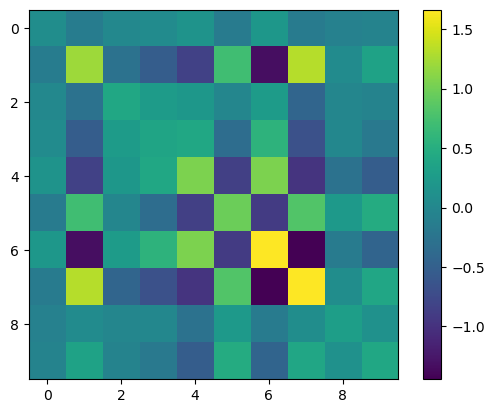

In [472]:
p=10
Psi=np.eye(p)
a_cov = stats.invwishart(df=p+2, scale=Psi).rvs()
n=100
x=stats.multivariate_normal(mean=np.zeros(p), cov=a_cov).rvs(size=n)
plt.imshow(a_cov)
plt.colorbar();

In [473]:
with pm.Model() as MNV_LKJ:
    
    packed_L = pm.LKJCholeskyCov("packed_L", n=p, eta=2.0, 
                                 sd_dist=pm.Exponential.dist(1.0, shape=2), 
                                 compute_corr=False)
    L = pm.expand_packed_triangular(p, packed_L)
    Sigma = pm.Deterministic('Sigma', L.dot(L.T))
    mu = pm.MvNormal('mu', mu=0, cov=np.eye(p), shape=p) 
    y = pm.MvNormal('y', mu=mu, chol=L,  #cov=Sigma
                    shape=(n,1), observed=x)   
    
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [packed_L, mu]


/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 23 seconds.


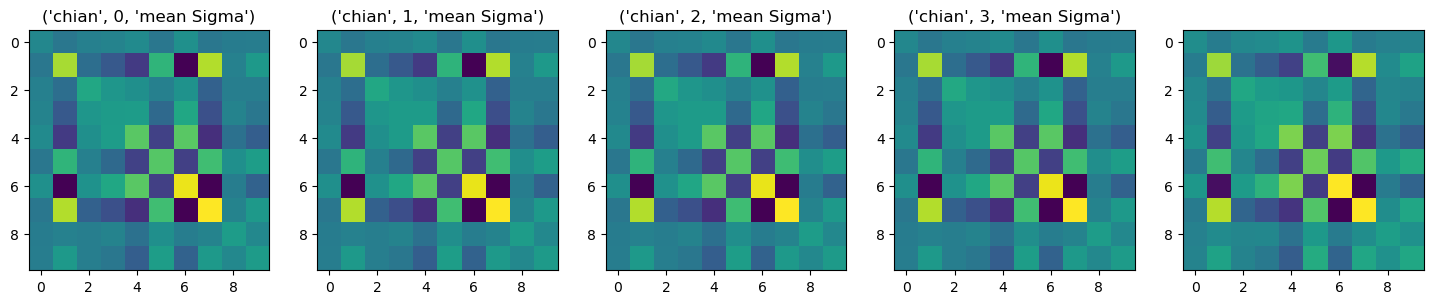

In [474]:
fig,ax = plt.subplots(1,5,figsize=(18,4))
ax[-1].imshow(a_cov)
ax[0].set_title(("Sigma used to generate y"))
for chain in range(4):
    ax[chain].imshow(idata.posterior['Sigma'].mean(axis=1)[chain])
    ax[chain].set_title(("chian",chain,"mean Sigma"))

## MVN computation 

Using the **Cholesky decomposition** is desirable because it provides efficient computation **MVN** evaluations $(2\pi )^{-k/2}\det({\boldsymbol {\Sigma }})^{-1/2}\,\exp \left(-{\frac {1}{2}}( {y} -{X\beta})^\top{\boldsymbol {\Sigma }}^{-1}({y} - {X\beta})\right)$ since

- $\det({\boldsymbol {\Sigma }}) = \det({LL^T}) = \det({L}) \det({L^T}) = \prod_{k=1}^p  {L}_{kk}^2$ 

as already seen above, but now also

- $(\textbf{y}-\boldsymbol\mu)^\top\boldsymbol\Sigma^{-1}(\textbf{y}-\boldsymbol\mu) = \boldsymbol \epsilon^\top  {L}^{-\top} {L}^{-1} \boldsymbol \epsilon = \underbrace{( {L}^{-1} \boldsymbol \epsilon)^\top( {L}^{-1} \boldsymbol \epsilon) =  \textbf{x}^\top \textbf{x}}_{\Large \Longrightarrow \; {L} \textbf{x}\; =\; \boldsymbol \epsilon} $ 

where $\textbf{x}$ can be efficiently solved for based on **lower triangular backwards substitution** and hence $\textbf{x}^\top \textbf{x}$ directly computed without requiring the inversion $\Sigma^{-1}$


## Week 10 Homework

---

### Q1: perform Bayesian Logistic Regression 

- For a binary outcome dataset you find interesting (perhaps from kaggle.com?)
- Model the outcome as a bernoulli random variable and use a **logit link** function
- Use `pm.Normal('betas', mu=0, sigma=1, shape=p)` rather than the `pm.MvNormal` version
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics

### Q2: perform Bayesian Multivariate Regression

- For a data set for which modeling multiple continuous outcomes might be interesting (perhaps from kaggle.com?)
- Use `pm.Normal('betas', mu=0, sigma=1, shape=(p,m))` rather than a `pm.MvNormal` alternative
- Use `y = pm.MvNormal('y', mu=X@betas, chol=L, observed=x)` for `(n,m)` shaped `y` and `(n,p)` shaped `X`
- Downsample your dataset to tentatively explore the effect of different values of `n`,`m`,`p` and 
    - report on your findings and based on that 
    - choose a "reasonably small" sized data set to perform an actual analysis
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics



In [295]:
n,m,p = 100,10,5
beta_ = np.ones((p,m))
X = stats.norm().rvs((n,p))
a_cov = stats.invwishart(df=m+2, scale=np.eye(m)).rvs()
x = X@beta_ + stats.multivariate_normal(mean=np.zeros(m), cov=a_cov).rvs(size=n)

with pm.Model() as MNV_LKJ:
    
    packed_L = pm.LKJCholeskyCov("packed_L", n=m, eta=2.0, 
                                 sd_dist=pm.Exponential.dist(1.0, shape=m), 
                                 compute_corr=False)
    L = pm.expand_packed_triangular(m, packed_L)
    betas = pm.Normal('betas', mu=0, sigma=1, shape=(p,m))
    Sigma = pm.Deterministic('Sigma', L.dot(L.T))
    y = pm.MvNormal('y', mu=X@betas, chol=L,  #cov=Sigma
                    observed=x)   
    
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [packed_L, betas]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 25 seconds.


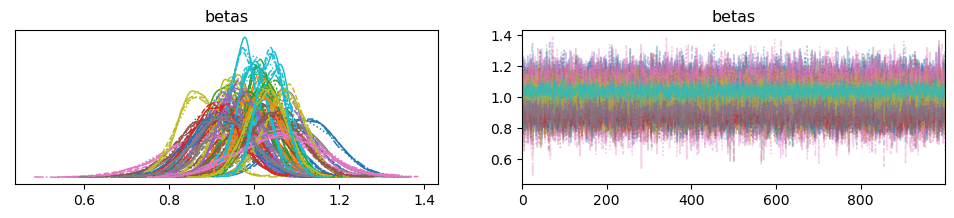

In [296]:
import arviz as az

az.plot_trace(idata,var_names='betas');

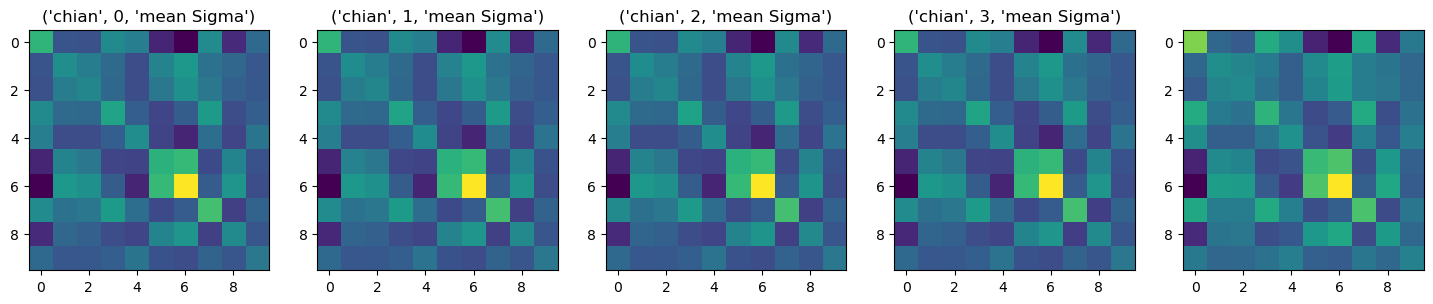

In [297]:
fig,ax = plt.subplots(1,5,figsize=(18,4))
ax[-1].imshow(a_cov)
ax[0].set_title(("Sigma used to generate y"))
for chain in range(4):
    ax[chain].imshow(idata.posterior['Sigma'].mean(axis=1)[chain])
    ax[chain].set_title(("chian",chain,"mean Sigma"))

### Probit Regression (as opposed to Logistic Regression)

- $\Phi$ is CDF of standard normal (and is also call the **inverse probit** function)
    - The **probit** function is $\Phi^{-1}$
- $z_i \sim N(x_i^\top\beta,1)$


$$\int \Phi(z_i)^{y_i} (1-\Phi(z_i))^{1-y_i}d\Phi(z) = \Phi(x_i^\top\beta)^{y_i} (1-\Phi(x_i^\top\beta))^{1-y_i} = p_i^{y_i} (1-p_i)^{1-y_i} $$

### Q3: perform Bayesian Multivariate Classification

- For a data set for which modeling multiple binary outcomes might be interesting (perhaps from kaggle.com?)
- Use `pm.Normal('betas', mu=0, sigma=1, shape=(p,m))` rather than a `pm.MvNormal` alternative
- Use `y = pm.Bernoulli('y', p=pm.math.invprobit(X@betas), observed=x)` for `(n,m)` shaped `y` and `(n,p)` shaped `X`
- Use latent `z = pm.MvNormal('z', mu=X@betas, chol=L)` as discussed in the "Generalized Linear Models (GLM)" section of the previous weeks lecture notes

> This provides normally distributed latent variables connected to the observed binary outcomes on which a latent covariance dependency structure may be modelled and estimated on the basis of imputing the unobserved latent variables based on their connection with the observed binary outcome variables.

- Downsample your dataset to tentatively explore the effect of different values of `n`,`m`,`p` and 
    - report on your findings and based on that 
    - choose a "reasonably small" sized data set to perform an actual analysis
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics


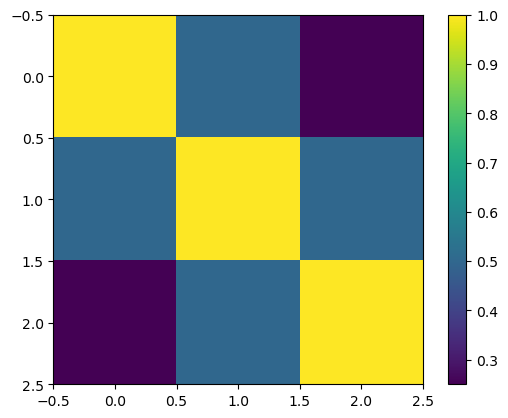

In [393]:
n,m,p = 100,3,3
beta_ = np.ones((p,m))
X = stats.norm().rvs((n,p))
#a_cov = stats.invwishart(df=m+2, scale=np.ones(m)).rvs()
a_cor = (np.ones((p,p))+np.diag((1,1,1)))/2
a_cor[0,-1] = 0.25
a_cor[-1,0] = 0.25
x = X@beta_ + stats.multivariate_normal(mean=np.zeros(m), cov=a_cor).rvs(size=n)
plt.imshow(a_cor)
plt.colorbar()

# Make outcome binary
x = x>0

In [394]:
with pm.Model() as GLM:
    
    L,R,std = pm.LKJCholeskyCov("R", n=m, eta=2.0, 
                                sd_dist=pm.Exponential.dist(1.0, shape=m), 
                                compute_corr=True)
    #L = pm.expand_packed_triangular(m, packed_L)
    betas = pm.Normal('betas', mu=0, sigma=1, shape=(p,m))
    #Sigma = pm.Deterministic('Sigma', L.dot(L.T))
    z = pm.MvNormal('z', mu=X@betas, cov=R) #cov=Sigma
    # the probit is the inverse cdf of a standard normal
    # the inverse probit is the cdf of a standard normal
    y = pm.Bernoulli('y', p=pm.math.invprobit(z), observed=x)   
    # Integrating out z would give:
    #y = pm.Bernoulli('y', p=pm.math.invprobit(X@betas), observed=x)   
    
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [R, betas, z]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 141 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 1424 divergences after tuning. Increase `target_accept` or reparameterize.


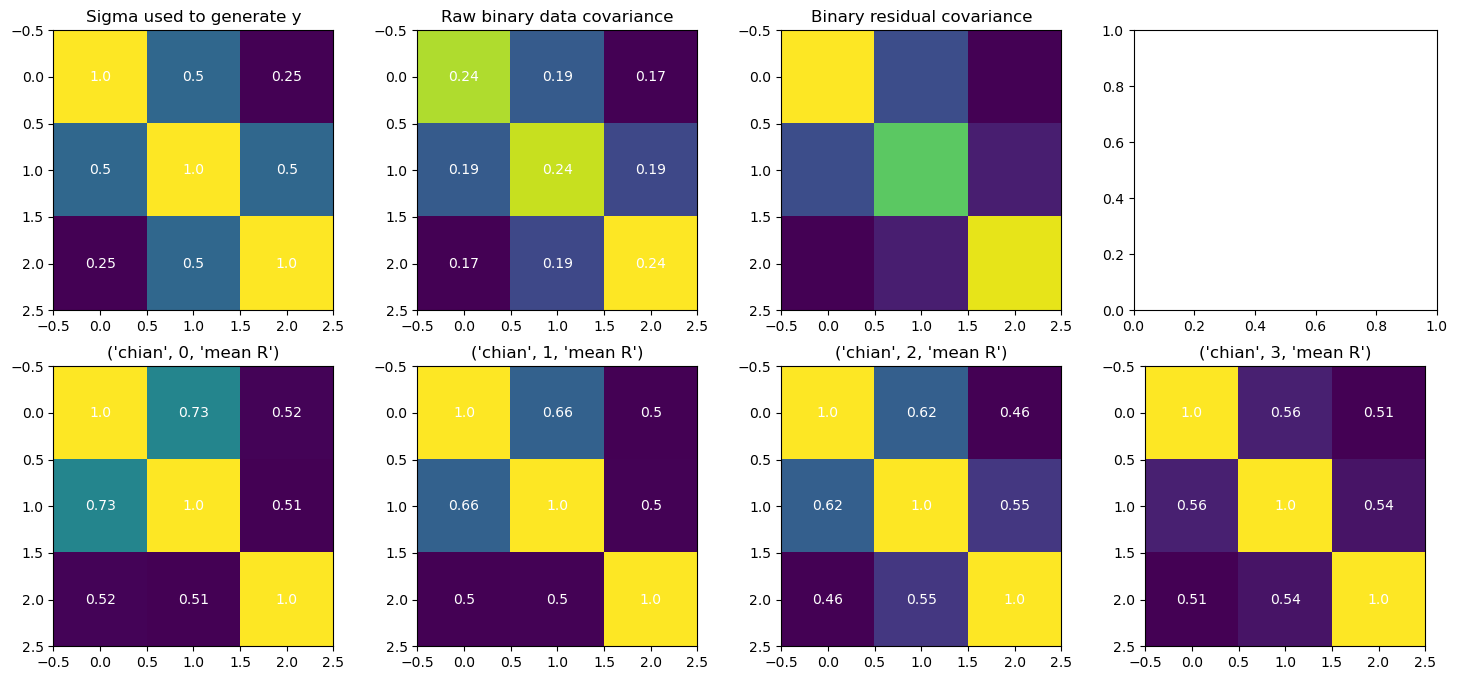

In [427]:
fig,ax = plt.subplots(2,4,figsize=(18,8))
ax[0,0].imshow(a_cor)
ax[0,0].set_title(("Sigma used to generate y"))
for i in range(3):
    for j in range(3):
        ax[0,0].text(i,j,str(round(a_cor[j,i],2)),
                     c='w', ha='center', va='center')
ax[0,1].imshow(np.cov(x.T))
ax[0,1].set_title(("Raw binary data covariance"))
for i in range(3):
    for j in range(3):
        ax[0,1].text(i,j,str(round(np.cov(x.T)[j,i],2)),
                     c='w', ha='center', va='center')
ax[0,2].imshow(np.cov((x-stats.norm().cdf(X@beta_)).T))
ax[0,2].set_title(("Binary residual covariance"))
for chain in range(4):
    ax[1,chain].imshow(idata.posterior['R_corr'].mean(axis=1)[chain])
    for i in range(3):
        for j in range(3):
            ax[1,chain].text(i,j,str(round(idata.posterior['R_corr'].mean(axis=1)[chain].values[j,i],2)),
                             c='w', ha='center', va='center')
    ax[1,chain].set_title(("chian",chain,"mean R"))

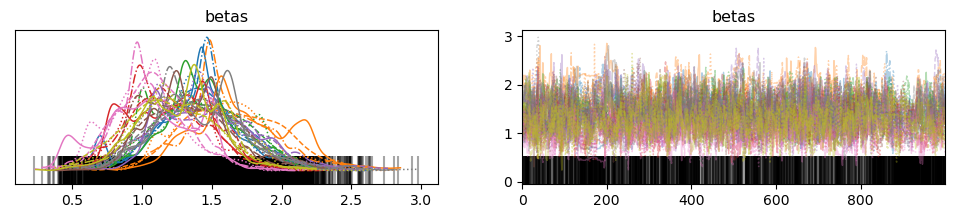

In [405]:
az.plot_trace(idata,var_names='betas');

# Answers

### Q1:

We begin by performing basic Bayesian logistic regression with a logit link function.

Recall that the logit function is defined as:

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

To make things interesting, let us choose to classify the images of written 0s and 1s from the UCI ML hand-written digits dataset. Hence, in a sense, we are *literally* classifying 0s and 1s.

First, we import the required libraries.

In [1]:
import numpy as np

import pymc as pm
import arviz as az

import matplotlib.pyplot as plt

from scipy import stats
from sklearn import datasets

Next, we shall create a helper function to simplify loading of the data:

In [7]:
# Helper function for loading binary image classes.
def load_binary_images_dataset() -> tuple[np.ndarray, np.ndarray]:
    digits = datasets.load_digits()

    mask = (digits.target == 0) | (digits.target == 1)

    return (digits.data[mask], digits.target[mask])

Since the images already come flattened, we can jump straight into performing the Bayesian logistic regression:

In [10]:
# Load the dataset.
x_data, y_data = load_binary_images_dataset()

# Scale the data to the range [0, 1].
x_data = x_data / np.max(x_data)

# Initialize and run the PyMC model.
with pm.Model() as model:
    # Initializing priors.
    betas = pm.Normal('betas', mu=0, sigma=2, shape=x_data.shape[1])
        
    # Probability of success using the logit link.
    p = pm.math.sigmoid(pm.math.dot(x_data, betas))
    
    # Likelihood.
    likelihood = pm.Bernoulli('likelihood', p=p, observed=y_data)

    # Sample from the posterior.
    idata = pm.sample(draws=2000, tune=1000, chains=4, target_accept=0.95, return_inferencedata=True)

 Progress                    Draws   Divergences   Step size   Grad evals   Sampling Speed   Elapsed   Remaining  
 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  ━━━━━━━━━━━━━━━━━━━━━━━━━   3000    0             0.10        31           32.52 draws/s    0:01:32   0:00:00    
  ━━━━━━━━━━━━━━━━━━━━━━━━━   3000    0             0.10        63           26.08 draws/s    0:01:55   0:00:00    
  ━━━━━━━━━━━━━━━━━━━━━━━━━   3000    0             0.09        31           23.95 draws/s    0:02:05   0:00:00    
  ━━━━━━━━━━━━━━━━━━━━━━━━━   3000    0             0.09        31           22.17 draws/s    0:02:15   0:00:00

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 165 seconds.


Now, we can plot the model diagnostics:

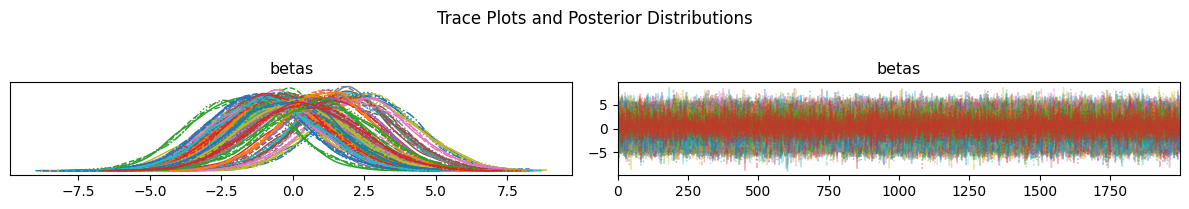

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],0.022,1.983,-3.764,3.631,0.019,0.022,10690.0,6061.0,1.0
betas[1],-0.020,1.996,-3.875,3.572,0.019,0.024,11534.0,6209.0,1.0
betas[2],0.021,1.863,-3.706,3.312,0.017,0.023,12201.0,5476.0,1.0
betas[3],-0.803,1.800,-4.018,2.690,0.016,0.019,12068.0,6242.0,1.0
betas[4],-0.378,1.729,-3.410,3.025,0.016,0.018,11359.0,6667.0,1.0
...,...,...,...,...,...,...,...,...,...
betas[59],-0.946,1.802,-4.208,2.540,0.017,0.019,11004.0,5609.0,1.0
betas[60],-0.222,1.769,-3.345,3.291,0.016,0.020,11707.0,6059.0,1.0
betas[61],1.171,1.631,-1.924,4.248,0.016,0.015,10184.0,5758.0,1.0
betas[62],0.990,1.885,-2.501,4.644,0.018,0.019,11144.0,5960.0,1.0


In [11]:
# Plot model diagnostics.
with model:
    # Plot trace plots and posterior distributions.
    az.plot_trace(idata)
    plt.suptitle('Trace Plots and Posterior Distributions', y=1.02)
    plt.tight_layout()
    plt.show()

    # Plot summary statistics.
    display(az.summary(idata))

Finally, we shall do inference with the model and compute the accuracy:

In [17]:
# Inference: Generate predictions
with model:
    # Compute the posterior predictive distribution
    ppc = pm.sample_posterior_predictive(trace, var_names=['likelihood'])

# Extract predicted probabilities
predictions = (ppc.posterior_predictive['likelihood'].mean(axis=0) >= 0.5).astype(int)

# Compute accuracy
accuracy = np.mean(predictions == y_data)

print(f'Accuracy: {accuracy * 100:.2f}%')

Sampling ... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:00:03

Accuracy: 99.91%


Thus, we have succesfully implemented Bayesian logistic regression for the binary classification of handwritten '0' or '1' images.

### Q2:

Now, we perform multivariate regression:

In [34]:
# Helper function to generate multivariate synthetic data.
def generate_multivariate_regression_data(size: int, outcomes: int, predictors: int) -> tuple:
    true_beta = np.ones((predictors, outcomes))
    
    # Generate a covariance matrix using the inverse-Wishart distribution.
    cov = stats.invwishart(df=(outcomes + 2), scale=np.eye(outcomes)).rvs()
    
    # Generate predictors and observed outcomes.
    x = stats.norm().rvs((size, predictors))
    y = x @ true_beta + stats.multivariate_normal(mean=np.zeros(outcomes), cov=cov).rvs(size=size)
    
    return x, y, cov

models = []
scenarios = [(100, 10, 5), (50, 7, 5), (100, 10, 3), (20, 10, 5)]

np.random.seed(seed=42)

# Iterate over different 'downsampled' scenarios.
for scenario in scenarios:
    n, m, p = scenario

    # Generate the synthetic data.
    x_data, y_data, true_cov = generate_multivariate_regression_data(*scenario)

    # Initialize and run the PyMC model.
    with pm.Model() as model:
        # Cholesky decomposition of the covariance matrix.
        packed_L = pm.LKJCholeskyCov(
            'packed_L',
            n=m, 
            eta=2.0,
            sd_dist=pm.Exponential.dist(1.0, shape=m),
            compute_corr=False
        )
        
        # Expand the packed Cholesky factor into a full matrix.
        L = pm.expand_packed_triangular(m, packed_L)
        
        # Coefficients.
        betas = pm.Normal('betas', mu=0, sigma=1, shape=(p, m))
        
        # Covariance matrix.
        sigma = pm.Deterministic('sigma', L.dot(L.T))
        
        # Likelihood.
        likelihood = pm.MvNormal('likelihood', mu=pm.math.dot(x_data, betas), chol=L, observed=y_data)
        
        idata = pm.sample(draws=2000, tune=1000, cores=4, chains=4, target_accept=0.90, return_inferencedata=True)
    
    models.append((model, idata, (x_data, y_data, true_cov)))

 Progress                    Draws   Divergences   Step size   Grad evals   Sampling Speed   Elapsed   Remaining  
 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  ━━━━━━━━━━━━━━━━━━━━━━━━━   3000    0             0.09        63           19.36 draws/s    0:02:34   0:00:00    
  ━━━━━━━━━━━━━━━━━━━━━━━━━   3000    0             0.09        63           19.88 draws/s    0:02:30   0:00:00    
  ━━━━━━━━━━━━━━━━━━━━━━━━━   3000    0             0.10        63           19.58 draws/s    0:02:33   0:00:00    
  ━━━━━━━━━━━━━━━━━━━━━━━━━   3000    0             0.11        63           17.81 draws/s    0:02:48   0:00:00

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 182 seconds.


We can view the diagnostics for each scenario:

Scenario: n=20, m=10, p=5


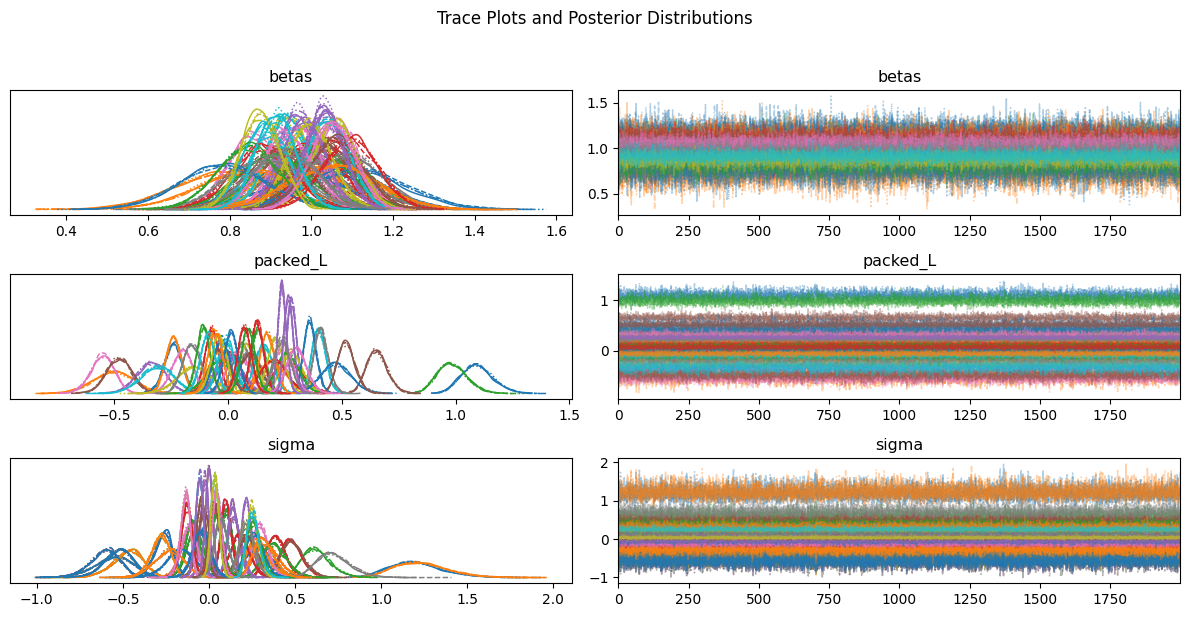

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"betas[0, 0]",1.020,0.122,0.788,1.252,0.002,0.001,4341.0,5825.0,1.0
"betas[0, 1]",0.794,0.126,0.562,1.031,0.002,0.001,4853.0,5091.0,1.0
"betas[0, 2]",1.059,0.089,0.886,1.222,0.001,0.001,5153.0,5988.0,1.0
"betas[0, 3]",0.974,0.078,0.818,1.114,0.001,0.001,4498.0,5611.0,1.0
"betas[0, 4]",1.031,0.053,0.931,1.129,0.001,0.000,6894.0,6340.0,1.0
...,...,...,...,...,...,...,...,...,...
"sigma[9, 5]",0.033,0.032,-0.026,0.096,0.000,0.000,8301.0,6127.0,1.0
"sigma[9, 6]",0.047,0.027,-0.002,0.101,0.000,0.000,9230.0,6680.0,1.0
"sigma[9, 7]",0.073,0.040,0.001,0.152,0.000,0.000,7149.0,5806.0,1.0
"sigma[9, 8]",0.036,0.024,-0.008,0.081,0.000,0.000,7119.0,6279.0,1.0


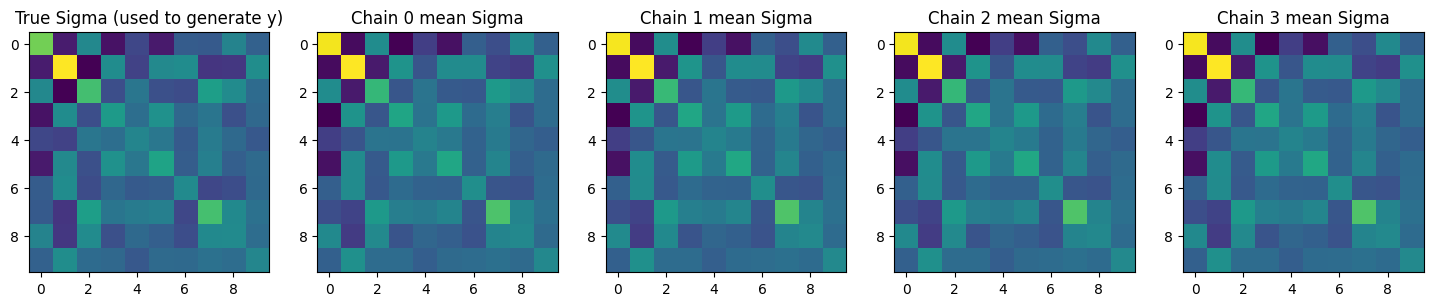

Scenario: n=20, m=10, p=5


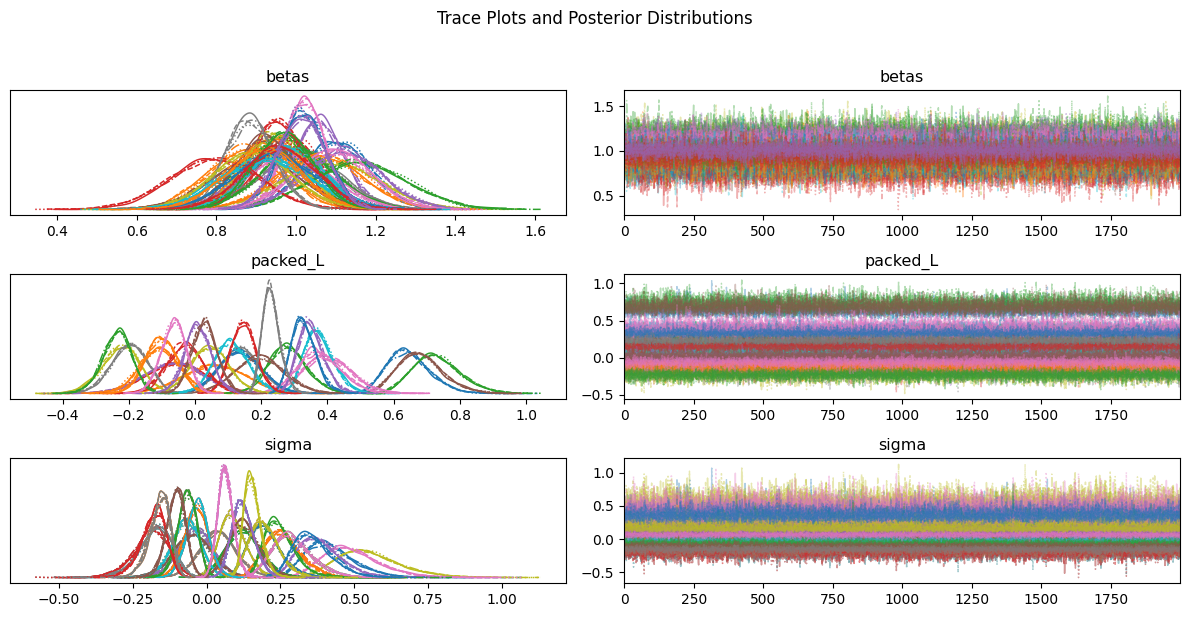

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"betas[0, 0]",1.101,0.083,0.946,1.254,0.001,0.001,7446.0,5971.0,1.0
"betas[0, 1]",0.873,0.097,0.689,1.053,0.001,0.001,7425.0,6476.0,1.0
"betas[0, 2]",0.933,0.092,0.753,1.099,0.001,0.001,7016.0,5972.0,1.0
"betas[0, 3]",0.985,0.079,0.843,1.144,0.001,0.001,6530.0,6283.0,1.0
"betas[0, 4]",1.057,0.065,0.932,1.178,0.001,0.001,7903.0,5912.0,1.0
...,...,...,...,...,...,...,...,...,...
"sigma[6, 2]",0.125,0.039,0.057,0.199,0.000,0.000,7692.0,6104.0,1.0
"sigma[6, 3]",-0.105,0.033,-0.168,-0.046,0.000,0.000,7199.0,6333.0,1.0
"sigma[6, 4]",0.065,0.027,0.015,0.115,0.000,0.000,7692.0,6250.0,1.0
"sigma[6, 5]",-0.160,0.036,-0.231,-0.099,0.000,0.000,7069.0,5920.0,1.0


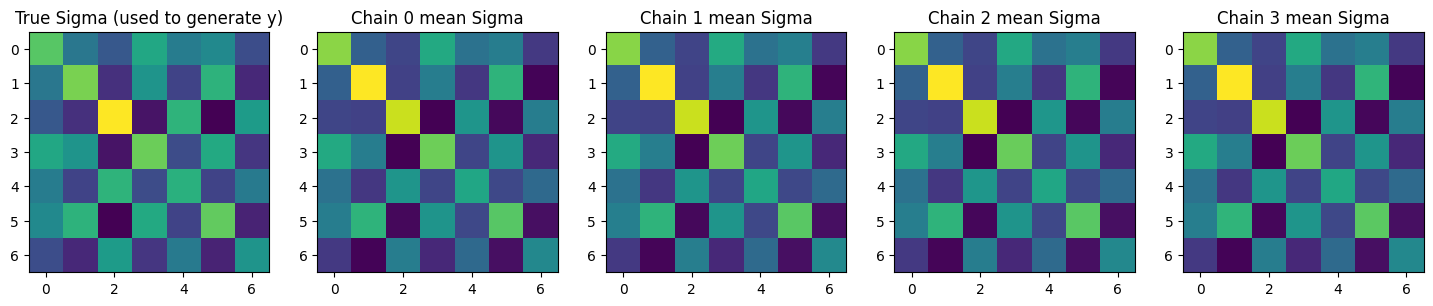

Scenario: n=20, m=10, p=5


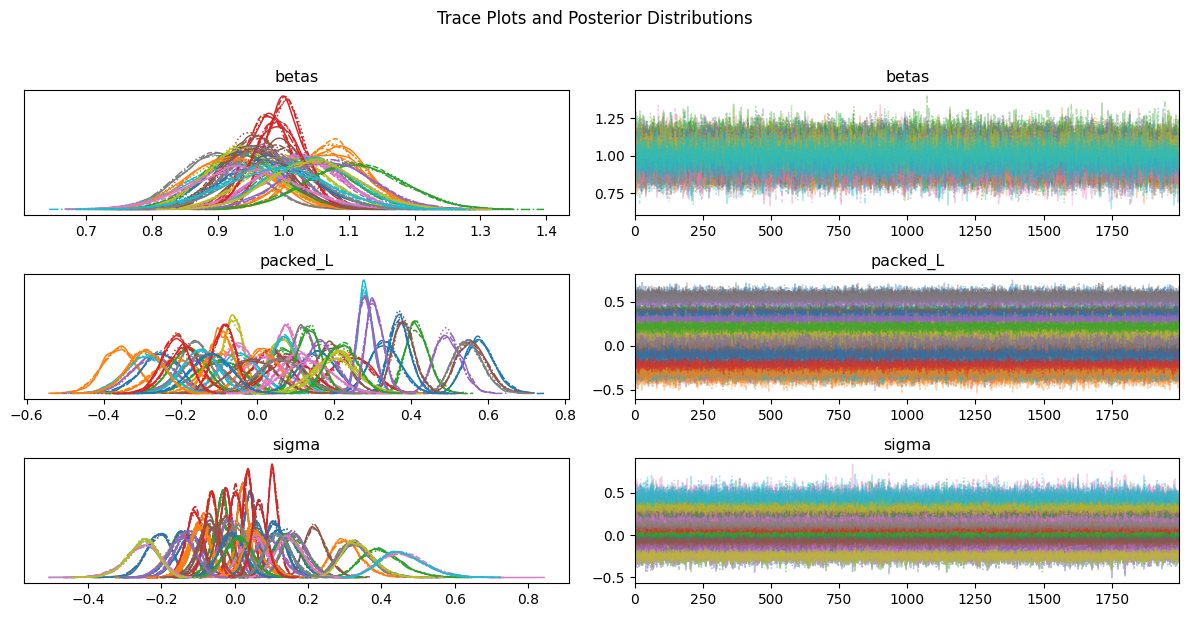

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"betas[0, 0]",0.941,0.060,0.827,1.049,0.001,0.0,8100.0,6659.0,1.0
"betas[0, 1]",1.069,0.058,0.964,1.180,0.001,0.0,8447.0,7021.0,1.0
"betas[0, 2]",1.036,0.066,0.909,1.160,0.001,0.0,8835.0,6887.0,1.0
"betas[0, 3]",0.977,0.035,0.916,1.049,0.000,0.0,10248.0,7047.0,1.0
"betas[0, 4]",1.023,0.060,0.908,1.132,0.001,0.0,9735.0,6873.0,1.0
...,...,...,...,...,...,...,...,...,...
"sigma[9, 5]",-0.075,0.030,-0.133,-0.019,0.000,0.0,9422.0,6354.0,1.0
"sigma[9, 6]",-0.253,0.049,-0.350,-0.167,0.001,0.0,9502.0,6561.0,1.0
"sigma[9, 7]",0.119,0.036,0.055,0.190,0.000,0.0,9429.0,7023.0,1.0
"sigma[9, 8]",-0.253,0.043,-0.332,-0.174,0.000,0.0,8260.0,5841.0,1.0


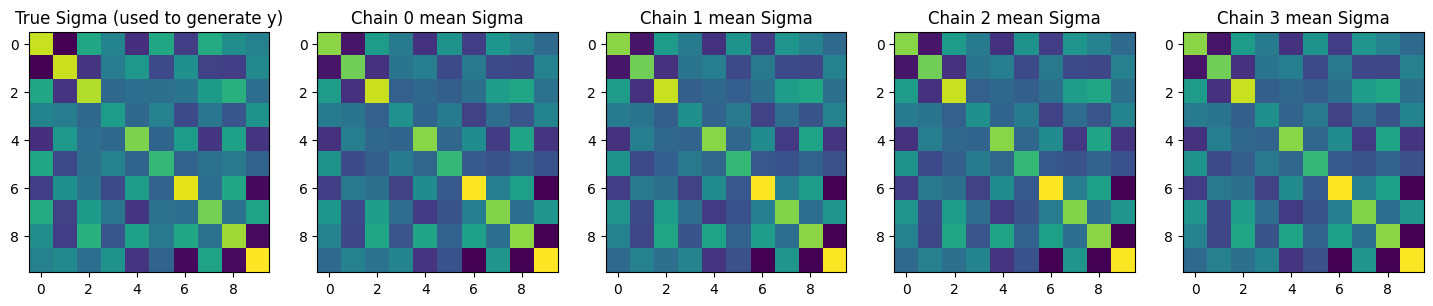

Scenario: n=20, m=10, p=5


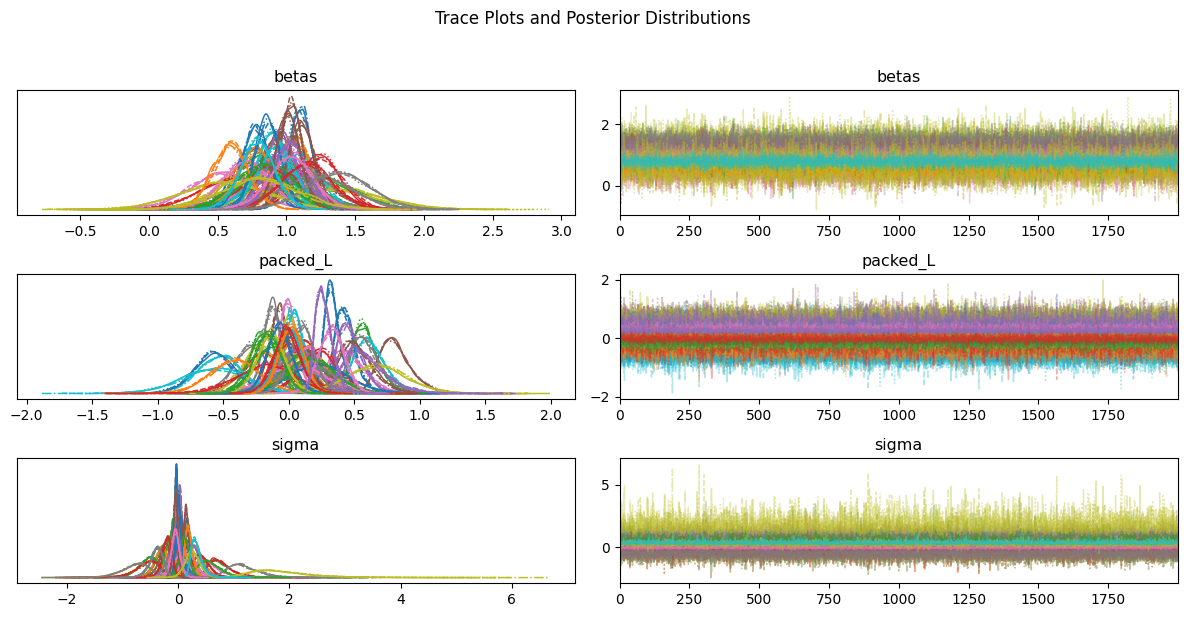

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"betas[0, 0]",1.026,0.130,0.772,1.261,0.002,0.001,4716.0,5228.0,1.0
"betas[0, 1]",0.959,0.176,0.650,1.313,0.002,0.002,5350.0,5508.0,1.0
"betas[0, 2]",0.980,0.248,0.529,1.462,0.003,0.002,5055.0,5666.0,1.0
"betas[0, 3]",1.084,0.244,0.623,1.547,0.004,0.003,4728.0,5709.0,1.0
"betas[0, 4]",0.879,0.172,0.529,1.188,0.002,0.002,5960.0,5700.0,1.0
...,...,...,...,...,...,...,...,...,...
"sigma[9, 5]",-0.044,0.046,-0.133,0.042,0.001,0.000,6418.0,5678.0,1.0
"sigma[9, 6]",-0.043,0.085,-0.197,0.124,0.001,0.001,6342.0,5722.0,1.0
"sigma[9, 7]",-0.398,0.128,-0.646,-0.176,0.002,0.001,5106.0,5949.0,1.0
"sigma[9, 8]",0.267,0.147,-0.002,0.549,0.002,0.001,6194.0,5937.0,1.0


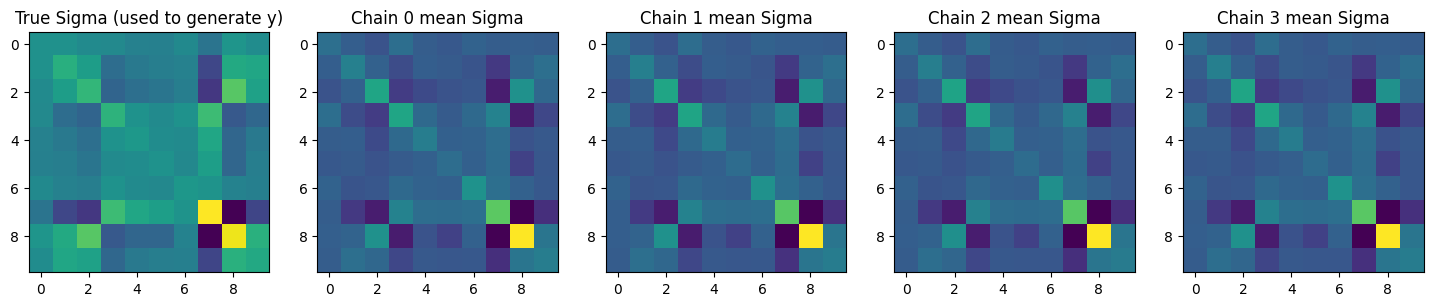

In [35]:
for scenario, model in zip(scenarios, models):
    print(f'Scenario: n={n}, m={m}, p={p}')

    with model[0]:
        # Plot trace plots and posterior distributions.
        az.plot_trace(model[1])
        plt.suptitle('Trace Plots and Posterior Distributions', y=1.02)
        plt.tight_layout()
        
        plt.show()
    
        # Plot summary statistics.
        display(az.summary(model[1]))
        
        # Diagnostic plots for the covariance matrix.
        fig, ax = plt.subplots(1, 5, figsize=(18, 4))
        ax[0].imshow(model[2][2])
        ax[0].set_title('True Sigma (used to generate y)')
        for chain in range(4):
            ax[chain + 1].imshow(model[1].posterior['sigma'].mean(axis=1)[chain])
            ax[chain + 1].set_title(f'Chain {chain} mean Sigma')
        
        plt.show()

### Q3:

Now, we move on to Bayesian multivariate classification. 

For the sake of consistency, we will leverage the previous synthetic dataset yet make modifications so that it is suitable for multivariate classification.

In [ ]:
# Helper function to generate multivariate classification data.
def generate_multivariate_binary_data(size: int, outcomes: int, predictors: int) -> tuple:
    true_beta = np.ones((predictors, outcomes))
    
    # Generate a covariance matrix using the inverse-Wishart distribution.
    cov = stats.invwishart(df=(outcomes + 2), scale=np.eye(outcomes)).rvs()
    
    x = stats.norm().rvs((size, predictors)) 
    z = x @ true_beta + stats.multivariate_normal(mean=np.zeros(outcomes), cov=cov).rvs(size=size)
    
    # Convert latent variables to binary outcomes.
    y = (z > 0).astype(int)
    
    return x, y, cov

# Making some slight modifications to the previous scenarios.
scenarios = [(35, 3, 5), (40, 5, 3), (20, 5, 5)]
models = []

np.random.seed(seed=42)

# Iterate over different 'downsampled' scenarios.
for scenario in scenarios:
    n, m, p = scenario

    # Generate the synthetic data.
    x_data, y_data, true_cov = generate_multivariate_binary_data(*scenario)

    # Initialize and run the PyMC model.
    with pm.Model() as model:
        # Cholesky decomposition of the covariance matrix.
        packed_L = pm.LKJCholeskyCov(
            'packed_L',
            n=m, 
            eta=2.0,
            sd_dist=pm.Exponential.dist(1.0, shape=m),
            compute_corr=False
        )
        
        # Expand the packed Cholesky factor into a full matrix.
        L = pm.expand_packed_triangular(m, packed_L)
        
        # Coefficients.
        betas = pm.Normal('betas', mu=0, sigma=1, shape=(p, m))
        
        # Latent variables.
        z = pm.MvNormal('z', mu=pm.math.dot(x_data, betas), chol=L, shape=(n, m))
        
        # Probit link function.
        p = pm.math.invprobit(z)
        
        # Likelihood.
        likelihood = pm.Bernoulli('likelihood', p=p, observed=y_data)
        
        idata = pm.sample(draws=1000, tune=1000, target_accept=0.95, return_inferencedata=True)
    
    models.append((model, idata, (x_data, y_data, true_cov)))

 Progress                    Draws   Divergences   Step size   Grad evals   Sampling Speed   Elapsed   Remaining  
 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  ━━━━━━━━━━━━━━━━━╸━━━━━━━   1415    62            0.03        415          1.41 draws/s     0:16:45   0:11:44    
  ━━━━━━━━━━╺━━━━━━━━━━━━━━   816     0             0.00        1023         1.23 s/draws     0:16:45   0:55:18    
  ━━━━━━━━━━━╸━━━━━━━━━━━━━   955     0             0.01        1023         1.05 s/draws     0:16:45   0:44:13    
  ━━━━━━━━━━━━━━━━╸━━━━━━━━   1334    49            0.01        255          1.33 draws/s     0:16:45   0:17:26

In [ ]:
for scenario, model in zip(scenarios, models):
    print(f'Scenario: n={n}, m={m}, p={p}')

    with model[0]:
        # Plot trace plots and posterior distributions.
        az.plot_trace(model[1])
        plt.suptitle('Trace Plots and Posterior Distributions', y=1.02)
        plt.tight_layout()
        
        plt.show()
    
        # Plot summary statistics.
        display(az.summary(model[1]))
        
        # Diagnostic plots for the covariance matrix.
        fig, ax = plt.subplots(1, 5, figsize=(18, 4))
        ax[0].imshow(model[2][2])
        ax[0].set_title('True Covariance Matrix')
        for chain in range(4):
            ax[chain + 1].imshow(model[1].posterior['packed_L'].mean(axis=1)[chain])
            ax[chain + 1].set_title(f'Chain {chain} Mean Covariance')
            
        plt.show()